In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

In [ ]:
!python -m spacy download en_core_web_lg

2023-11-01 10:10:07.633836: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 10:10:07.633888: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 10:10:07.633918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 10:10:08.826630: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('/content/drive/MyDrive/Machine_learning_project/spam classification/spam.csv', encoding='iso-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.shape

(5572, 5)

## Data Preprocessing

## Data Cleaning

In [ ]:
df.columns.tolist()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [ ]:
# Drop useless columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data = df.drop(columns=columns_to_drop)

# Display the modified DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
data.head()


DataFrame after dropping columns:


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
data.rename(columns={'v1': 'Class', 'v2': 'Message'}, inplace=True)
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
def Correct_Class(data):
  for i in range(len(data)):
    if data['Class'].values[i] == 'ham':
      data['Class'].values[i] = 'not spam'
    else:
      continue
  return data


data = Correct_Class(data)
data.head()

,Class,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
for i in range(10):
  text = data["Message"].values[i]
  Class = data['Class'].values[i]
  print("Message: {} Class: {}".format(i, Class))
  print(text)


Message: 0 Class: not spam
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Message: 1 Class: not spam
Ok lar... Joking wif u oni...
Message: 2 Class: spam
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Message: 3 Class: not spam
U dun say so early hor... U c already then say...
Message: 4 Class: not spam
Nah I don't think he goes to usf, he lives around here though
Message: 5 Class: spam
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Message: 6 Class: not spam
Even my brother is not like to speak with me. They treat me like aids patent.
Message: 7 Class: not spam
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Calle

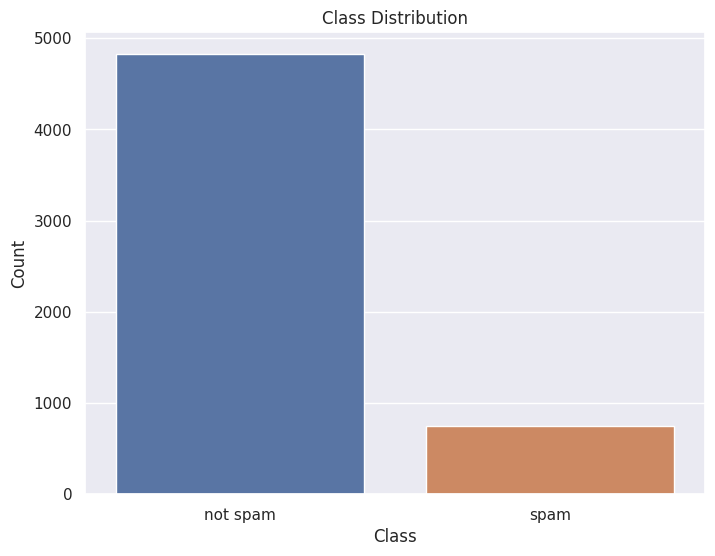

In [ ]:
# Check the data Balancing

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Class')

# Set labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")

# Show the plot
plt.show()


* The data seems to be unbalanced

In [ ]:
data['target'] = data['Class'].map({
    'not spam' : 0,
    'spam' : 1
})

In [ ]:
data.head()

,Class,Message,target
0,not spam,"Go until jurong point, crazy.. Available only ...",0
1,not spam,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,not spam,U dun say so early hor... U c already then say...,0
4,not spam,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:

# Load spaCy and the Word2Vec model
nlp = spacy.load('en_core_web_lg')
wv = api.load('word2vec-google-news-300')

def get_word_vector(word):
    try:
        return wv[word]
    except KeyError:
        # Handle out-of-vocabulary words (e.g., use a zero vector)
        return np.zeros(300)  # Assuming 300 dimensions for the Word2Vec model

def preprocess_and_vectorize(text):
    doc = nlp(text)

    filtered_vectors = []

    for token in doc:
        if token.is_punct or token.is_stop or not token.is_alpha:
            # Handle non-text tokens
            # Here, you can skip them or use a placeholder
            # For example, you can skip them using 'continue' or use a zero vector
            continue

        word_vector = get_word_vector(token.lemma_)
        filtered_vectors.append(word_vector)

    if not filtered_vectors:
        # Handle cases where all tokens are non-text (empty or punctuation)
        # You can choose to return a zero vector or another suitable placeholder
        return np.zeros(300)  # Assuming 300 dimensions for the Word2Vec model

    # Calculate the mean vector for the filtered word vectors
    mean_vector = np.mean(filtered_vectors, axis=0)

    return mean_vector

# Example usage:
text = "This is an example sentence. It contains words."
vector = preprocess_and_vectorize(text)
print(vector)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[ 0.17001343 -0.07463264  0.18792725  0.01477051  0.03326416  0.09033203
  0.16601562 -0.05615234  0.1371727   0.12614441 -0.03149414 -0.15975952
 -0.0645752   0.05700684 -0.07082748  0.21606445  0.07278442  0.06152344
 -0.12219238 -0.19421387  0.08551025  0.18518066 -0.00091553 -0.04727173
  0.0047617  -0.08868408 -0.05633545  0.01353836  0.06210327  0.2110014
  0.00527954 -0.03045654 -0.12432861  0.09403992 -0.00061035  0.20574951
  0.04098511 -0.02178955 -0.07427979  0.15197754  0.09701538  0.02886963
 -0.06869507 -0.02581787 -0.09786987 -0.0725708  -0.09048462  0.03631592
 -0.18823242  0.01806641  0.04699707 -0.00384521 -0.1094408  -0.07861328
  0.14074707 -0.04919434 -0.05072021 -0.19711304 -0.0274353  -0.0144043
  0.09783936 -0.02618408 -0.04953003 -0.00897217 -0.01806641  0.07666016
  0.04760742 -0.00756836 -0.14465332 -0.04266357  0.16148065  0.02328491
 -0.00024414 -0.16235352 -0.10498047 -0

In [ ]:
data['vector'] = data['Message'].apply(lambda text: preprocess_and_vectorize(text))

In [ ]:
data.head()

,Class,Message,target,vector
0,not spam,"Go until jurong point, crazy.. Available only ...",0,"[-0.018648274739583335, 0.030452473958333334, ..."
1,not spam,Ok lar... Joking wif u oni...,0,"[-0.08577728, 0.057678223, 0.04466756, 0.11112..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[-0.020802308, -0.06276042, -0.0884847, 0.0212..."
3,not spam,U dun say so early hor... U c already then say...,0,"[-0.100260414, 0.109944664, 0.15781657, 0.1220..."
4,not spam,"Nah I don't think he goes to usf, he lives aro...",0,"[-0.044311523, 0.0456604, 0.039697267, 0.20253..."


## Splitting the data

In [ ]:
X, y = data.vector.values, data.target

# Perform stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print(f'X_train shape:{X_train.shape}, X_train_2d shape: {X_train_2d.shape}')
print(f'X_test shape:{X_train.shape}, X_test_2d shape: {X_train_2d.shape}')

X_train shape:(3900,), X_train_2d shape: (3900, 300)
X_test shape:(3900,), X_test_2d shape: (3900, 300)


## Train Machine Learning Model

In [ ]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance

# Print the F1 score
print("F1 Score: {:.2f}".format(f1))

F1 Score: 0.80


In [ ]:
# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42, n_estimators= 1000,
                               verbose = 1,
                               )

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance

# Print the F1 score
print("F1 Score: {:.2f}".format(f1))



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   15.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   27.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s


F1 Score: 0.96


In [ ]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define XGBoost parameters for binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
}

# Specify the number of boosting rounds
num_round = 1000

# Create a watchlist for early stopping
watchlist = [(dtest, 'eval'), (dtrain, 'train')]

# Train the XGBoost model with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_round,
    evals=watchlist,
    early_stopping_rounds=30,  # Early stopping rounds
    verbose_eval=10,
    maximize=False,
)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Convert probabilities to binary predictions using a threshold (0.5 in this example)
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Calculate the F1 score on the test set
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print("F1 Score: {:.2f}".format(f1))

[0]	eval-logloss:0.38050	train-logloss:0.37769
[10]	eval-logloss:0.24740	train-logloss:0.22840
[20]	eval-logloss:0.18949	train-logloss:0.16401
[30]	eval-logloss:0.15651	train-logloss:0.12730
[40]	eval-logloss:0.13607	train-logloss:0.10291
[50]	eval-logloss:0.12055	train-logloss:0.08493
[60]	eval-logloss:0.10887	train-logloss:0.07129
[70]	eval-logloss:0.10081	train-logloss:0.05978
[80]	eval-logloss:0.09501	train-logloss:0.05123
[90]	eval-logloss:0.08960	train-logloss:0.04420
[100]	eval-logloss:0.08554	train-logloss:0.03863
[110]	eval-logloss:0.08193	train-logloss:0.03357
[120]	eval-logloss:0.07946	train-logloss:0.02943
[130]	eval-logloss:0.07733	train-logloss:0.02553
[140]	eval-logloss:0.07525	train-logloss:0.02235
[150]	eval-logloss:0.07439	train-logloss:0.01959
[160]	eval-logloss:0.07317	train-logloss:0.01727
[170]	eval-logloss:0.07204	train-logloss:0.01539
[180]	eval-logloss:0.07204	train-logloss:0.01373
[190]	eval-logloss:0.07165	train-logloss:0.01234
[200]	eval-logloss:0.07084	trai

In [ ]:
report = classification_report(y_test, y_pred_binary)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.97      0.88      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



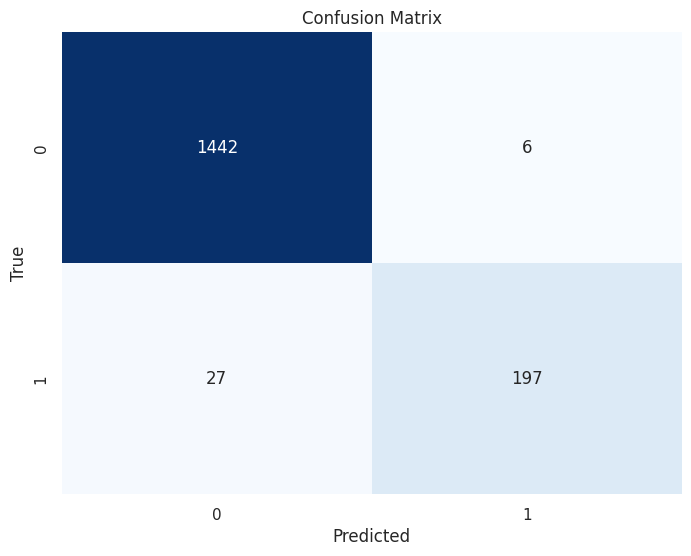

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
data.head()

,Class,Message,target,vector
0,not spam,"Go until jurong point, crazy.. Available only ...",0,"[-0.018648274739583335, 0.030452473958333334, ..."
1,not spam,Ok lar... Joking wif u oni...,0,"[-0.08577728, 0.057678223, 0.04466756, 0.11112..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[-0.020802308, -0.06276042, -0.0884847, 0.0212..."
3,not spam,U dun say so early hor... U c already then say...,0,"[-0.100260414, 0.109944664, 0.15781657, 0.1220..."
4,not spam,"Nah I don't think he goes to usf, he lives aro...",0,"[-0.044311523, 0.0456604, 0.039697267, 0.20253..."
